<a href="https://colab.research.google.com/github/Ms-Gichuhi/R-tSNE-PCA-Feature-selection--week14IP/blob/main/R_week_14_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Research question

As a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

##Metric of success

Perform your analysis and provide insights gained from your analysis.

Perform dimensionality reduction

Perform feature selection

Perform association analysis

Perform anomality test




##Part 1: Dimensionality Reduction

This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA.

In [118]:
install.packages("data.table")
require(data.table)
# Importing our database
# ---
# install package data.table to work with data tables
library(data.table) # load package
install.packages("tidyverse") # install packages to work with data frame - extends into visualization
library(tidyverse) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [119]:
# Reading our dataset
# ---
# 
data <- read.csv('Supermarket_Sales_Data.csv')

In [120]:
head(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [121]:
tail(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [122]:
colSums(is.na(data))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [123]:
#checking for duplicates
duplicates <- duplicated(data)
duplicates

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [124]:
#installing more libriries and packages
install.packages('corrplot')
library(corrplot)
library(ggplot2) 
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



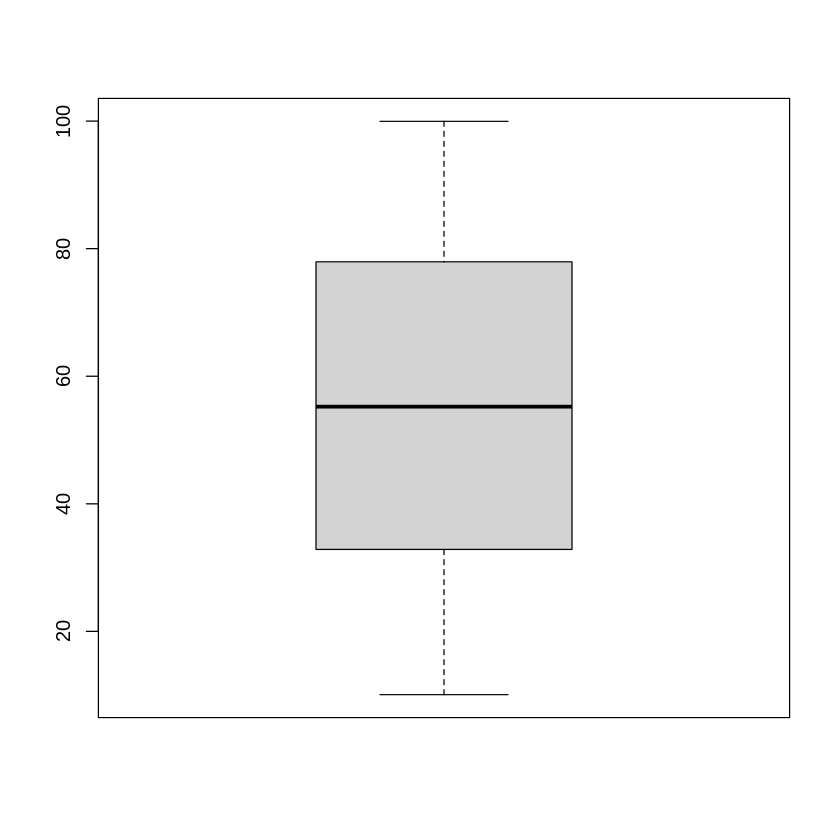

In [125]:
#checking for outliers
#Unit Price
boxplot(data$Unit.price)


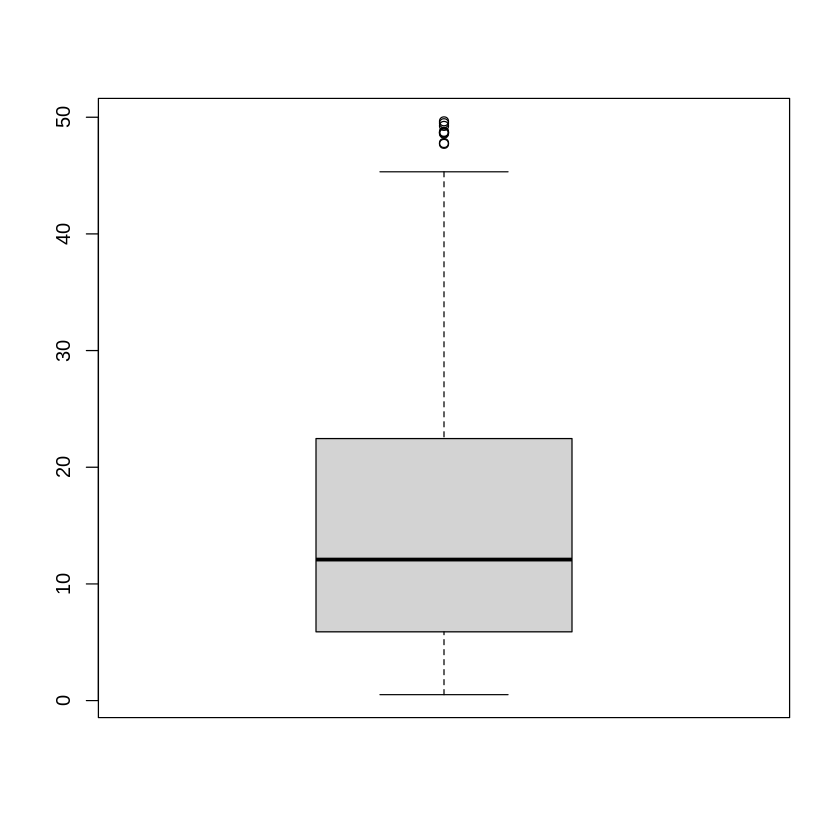

In [126]:
#Tax Column
boxplot(data$Tax)


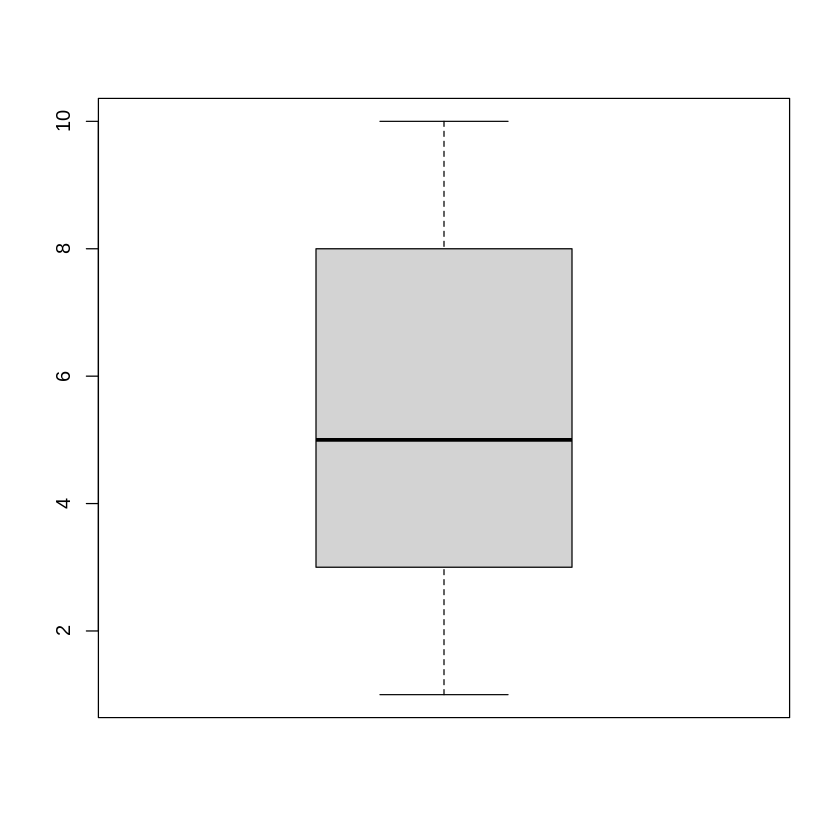

In [127]:
#Quantity Column
boxplot(data$Quantity)


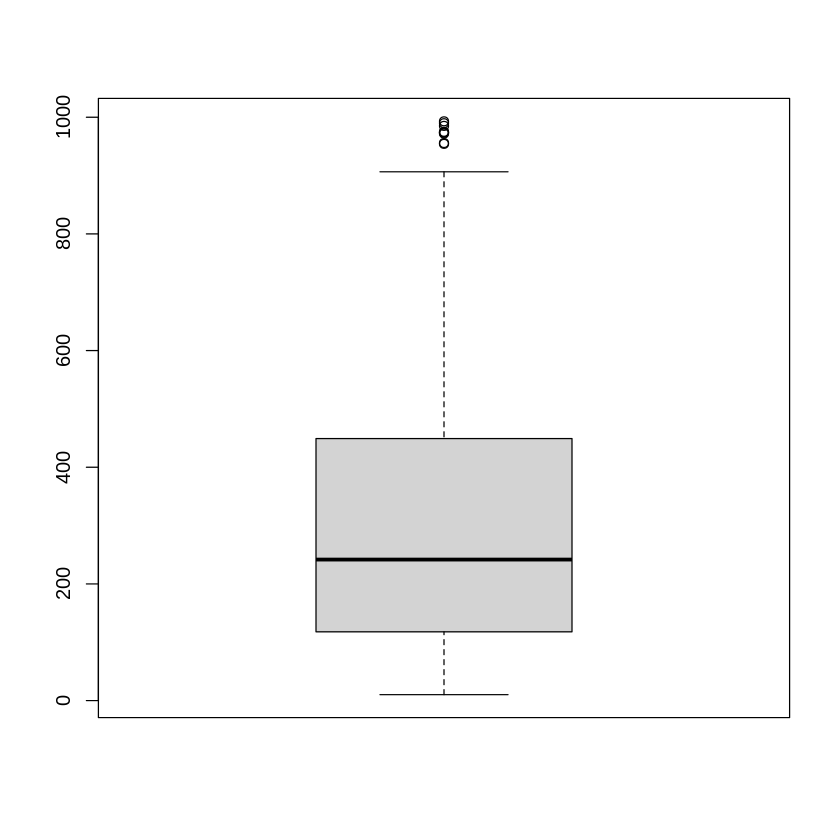

In [128]:
#Cogs Column
boxplot(data$cogs)


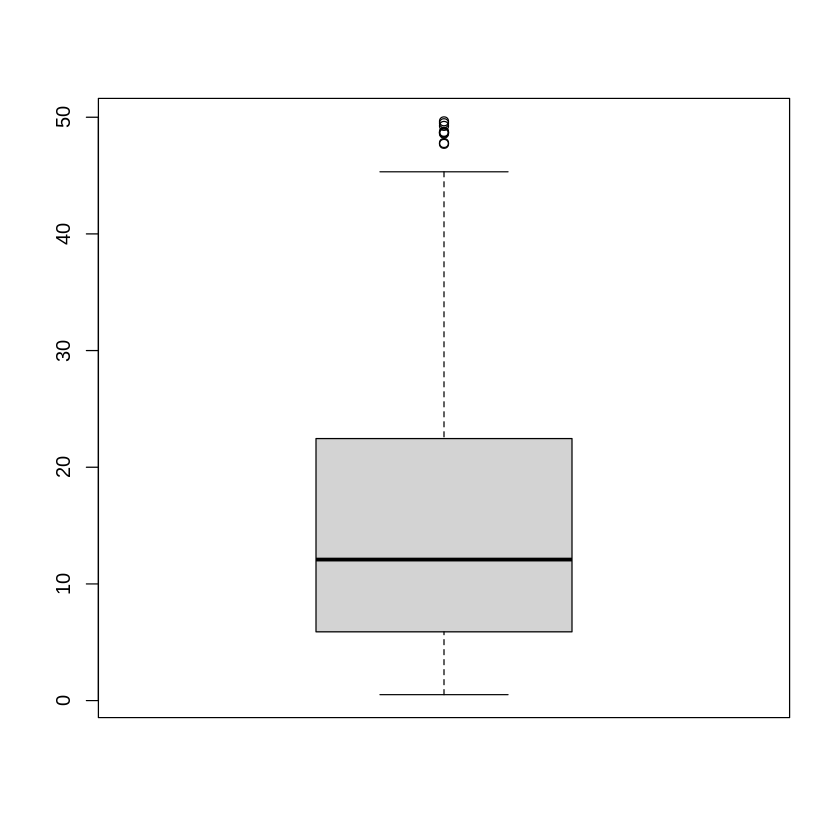

In [129]:
#Gross income Column
boxplot(data$gross.income)


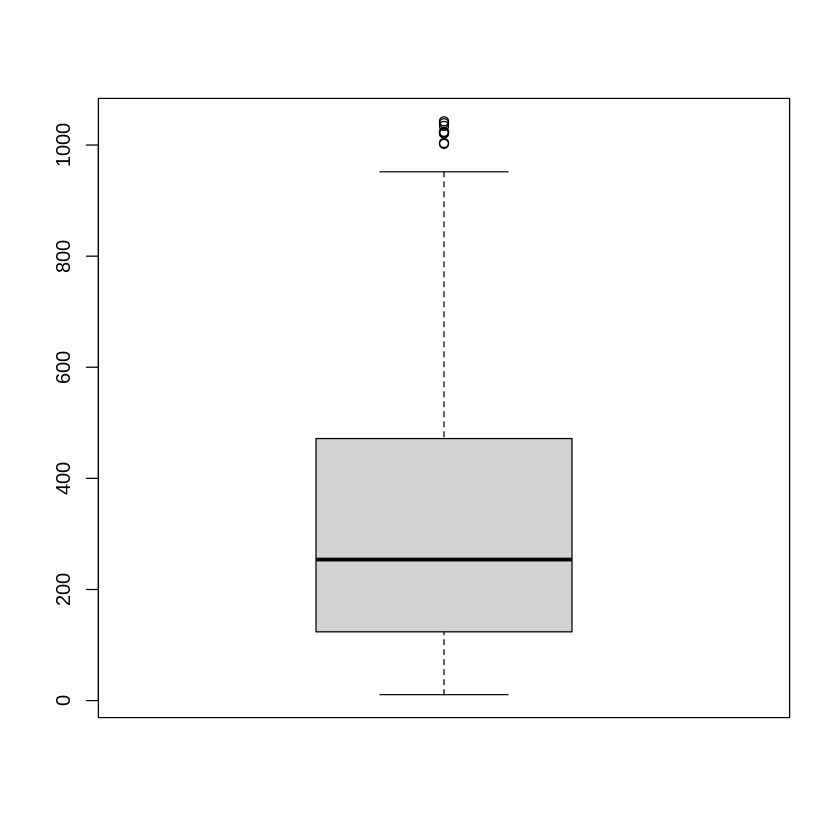

In [130]:
#Total Column
boxplot(data$Total)

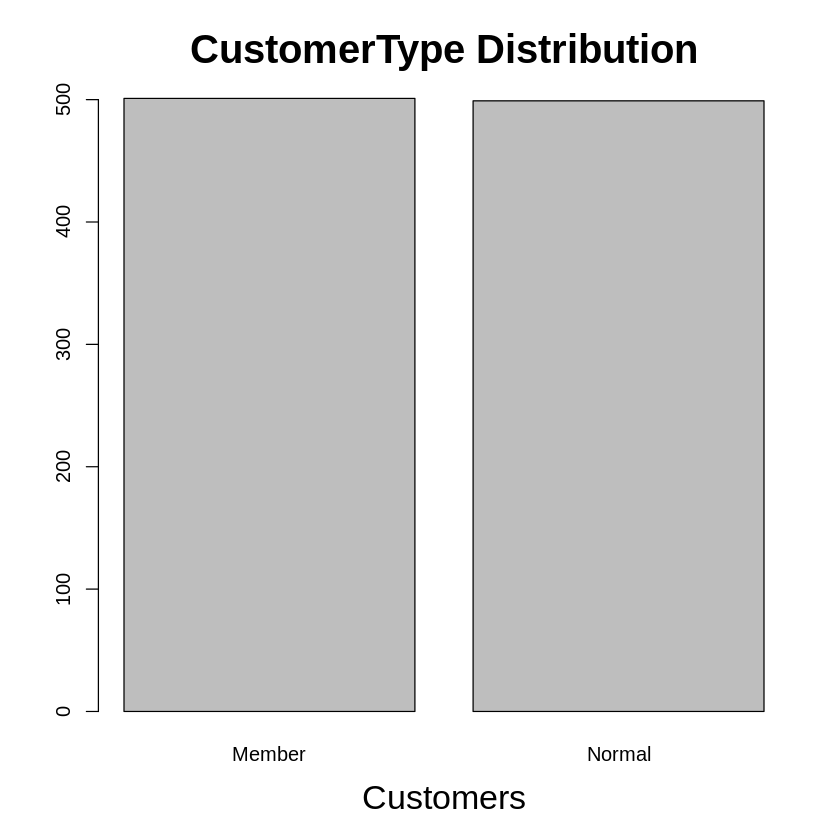

In [131]:
# CustomerType column visualization

customer <- data$Customer.type
customer_freq <- table(customer)
barplot(customer_freq, main = "CustomerType Distribution", xlab = "Customers",cex.main=2, cex.lab=1.7, cex.sub=1.2)


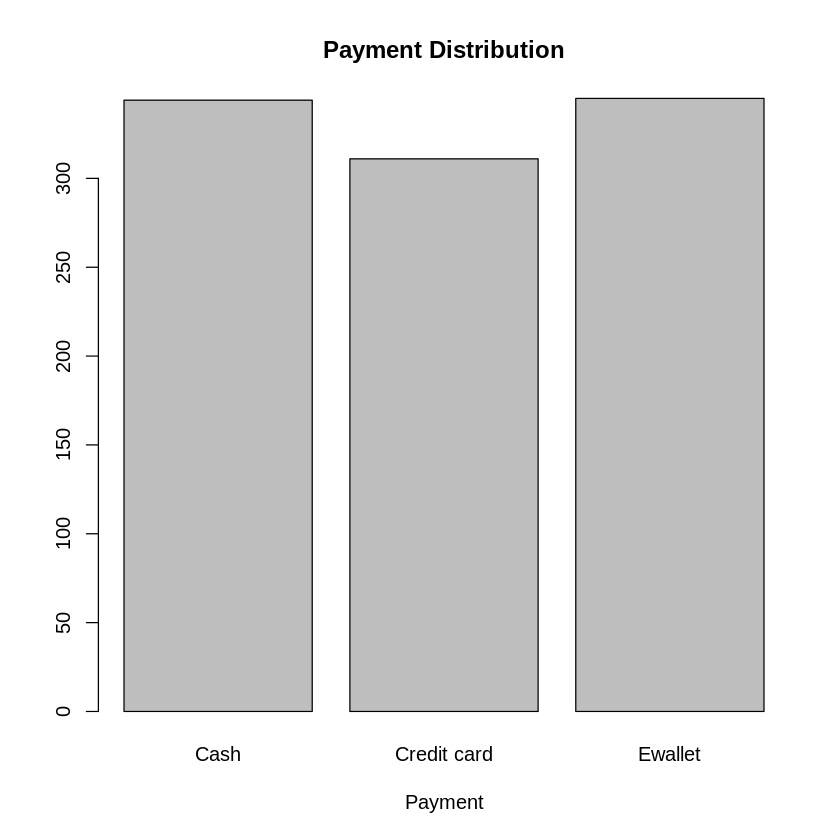

In [132]:
payment <- data$Payment
payment_freq <- table(payment)
barplot(payment_freq, main = "Payment Distribution", xlab = "Payment")


###R t-SNE

In [134]:
# Installing Rtnse package
# 
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [135]:
# Loading our tnse library
# 
library(Rtsne)

In [136]:
# Curating the database for analysis 
# 
Labels<-data$Customer.type
data$Customer.type<-as.factor(data$Customer.type)

In [137]:
# For plotting
#
colors = rainbow(length(unique(data$Customer.type)))
names(colors) = unique(data$Customer.type)

In [138]:
# Executing the algorithm on curated data
# 
tsne <- Rtsne(data[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 58.678217 (50 iterations in 0.15 seconds)
Iteration 100: error is 51.308844 (50 iterations in 0.12 seconds)
Iteration 150: error is 50.042774 (50 iterations in 0.12 seconds)
Iteration 200: error is 49.564704 (50 iterations in 0.12 seconds)
Iteration 250: error is 49.312487 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.570885 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.408490 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.363714 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.346716 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.334450 (50 iterations in 0.13 seconds)
Fitting performed in 1.29 seconds.


In [139]:
# Getting the duration of execution
# 
exeTimeTsne <- system.time(Rtsne(data[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 58.944668 (50 iterations in 0.15 seconds)
Iteration 100: error is 51.825584 (50 iterations in 0.12 seconds)
Iteration 150: error is 50.744265 (50 iterations in 0.13 seconds)
Iteration 200: error is 50.330101 (50 iterations in 0.13 seconds)
Iteration 250: error is 50.149296 (50 iterations in 0.14 seconds)
Iteration 300: error is 0.548493 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.387300 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.352754 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.337147 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.326408 (50 iterations in 0.14 seconds)
Fitting performed in 1.32 seconds.


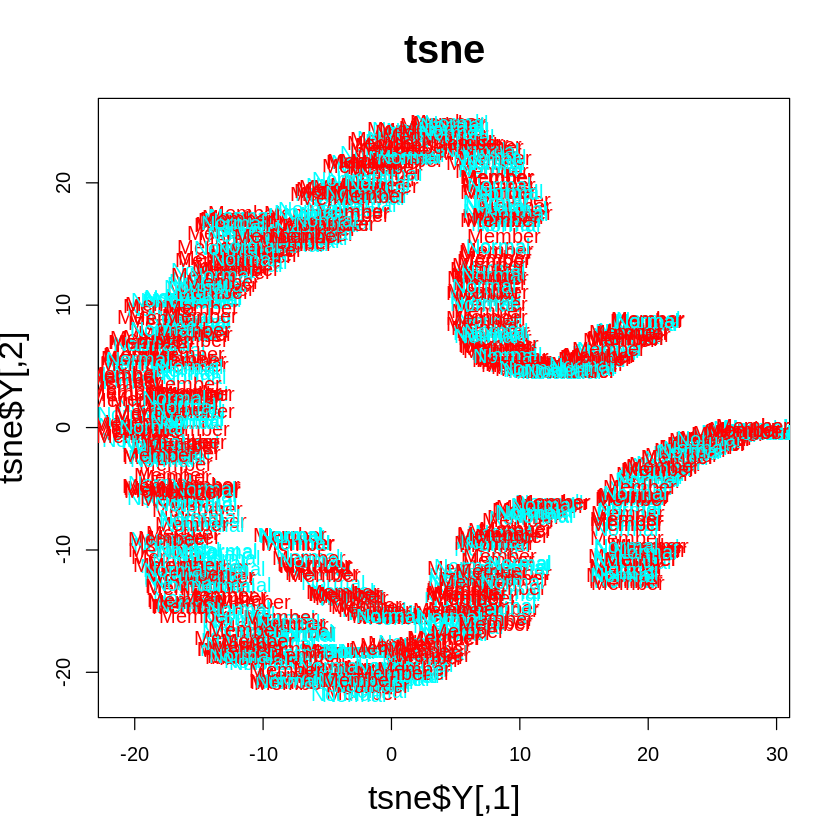

In [140]:
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne",cex.main=2, cex.lab=1.7, cex.sub=1.2)
text(tsne$Y, labels=data$Customer.type, col=colors[data$Customer.type])

#PCA

In [141]:
#Encode the categorical columns to integers
# Product.line column
data$Product.line<-as.integer(data$Product.line)
#Payment column
data$Payment<-as.integer(data$Payment)
# Branch
data$Branch<-as.integer(data$Branch)
# Customer Type
data$Customer.type<-as.integer(data$Customer.type)
# Gender
data$Gender<-as.integer(data$Gender)



Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [142]:
#install.packages("lubridate") 
#Date split package
library(lubridate)


In [143]:
# Convert to date datatype first
data$Date <- as.Date(data$Date, "%m/%d/%Y")
data$year <- year(ymd(data$Date))
data$month <- month(ymd(data$Date)) 
data$day <- day(ymd(data$Date))


In [144]:
#Extract numerical and integer columns only 
df <- select_if(data,is.numeric)
str(df)


'data.frame':	1000 obs. of  16 variables:
 $ Branch                 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Customer.type          : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Product.line           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ year                   : num  2019 2019 2019 2019 2019 ...
 $ month                  : num  1 3 3 1 2 3 2 2 1 2 .

In [145]:
colSums(is.na(df))

Branch           Customer.type                  Gender 
                   1000                       0                    1000 
           Product.line              Unit.price                Quantity 
                   1000                       0                       0 
                    Tax                 Payment                    cogs 
                      0                    1000                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total                    year                   month 
                      0                       0                       0 
                    day 
                      0

In [146]:
install.packages("caret")
library('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [147]:
#Error in prcomp.default(df, center = TRUE, scale. = TRUE): cannot rescale a constant/zero column to unit variance
#removing constant zeros ie: branch, Gender, payment and product line
#first checking columns with zero variance
colvars <- nearZeroVar(df, saveMetrics = TRUE)
print(colvars)

                        freqRatio percentUnique zeroVar   nzv
Branch                   0.000000           0.0    TRUE  TRUE
Customer.type            1.004008           0.2   FALSE FALSE
Gender                   0.000000           0.0    TRUE  TRUE
Product.line             0.000000           0.0    TRUE  TRUE
Unit.price               1.500000          94.3   FALSE FALSE
Quantity                 1.062500           1.0   FALSE FALSE
Tax                      1.000000          99.0   FALSE FALSE
Payment                  0.000000           0.0    TRUE  TRUE
cogs                     1.000000          99.0   FALSE FALSE
gross.margin.percentage  0.000000           0.1    TRUE  TRUE
gross.income             1.000000          99.0   FALSE FALSE
Rating                   1.083333           6.1   FALSE FALSE
Total                    1.000000          99.0   FALSE FALSE
year                     0.000000           0.1    TRUE  TRUE
month                    1.020290           0.3   FALSE FALSE
day     

In [148]:
#removing the columns now
df <- subset(df, select = -c(Branch, Gender, Product.line, Payment, year, gross.margin.percentage))

In [149]:
# We then pass df to the prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
# 
df.pca <- prcomp(df, center = TRUE, scale. = TRUE)
summary(df.pca)



Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2188 1.0719 1.0084 1.0000 0.98571 0.92168 0.29978
Proportion of Variance 0.4923 0.1149 0.1017 0.1000 0.09716 0.08495 0.00899
Cumulative Proportion  0.4923 0.6072 0.7089 0.8089 0.90606 0.99101 1.00000
                             PC8       PC9      PC10
Standard deviation     6.084e-16 1.718e-16 1.199e-17
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00

 As a result we obtain 7 principal components,  each which explain a percentate of the total variation of the dataset PC1 explains 49% of the total variance,this indicates that half of the information in the dataset can be encapsulated by just that one Principal Component.

In [150]:
# Calling str() to have a look at your PCA object

str(df.pca)

List of 5
 $ sdev    : num [1:10] 2.219 1.072 1.008 1 0.986 ...
 $ rotation: num [1:10, 1:10] 0.012 -0.292 -0.324 -0.45 -0.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "Customer.type" "Unit.price" "Quantity" "Tax" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] 1.5 55.67 5.51 15.38 307.59 ...
  ..- attr(*, "names")= chr [1:10] "Customer.type" "Unit.price" "Quantity" "Tax" ...
 $ scale   : Named num [1:10] 0.5 26.49 2.92 11.71 234.18 ...
  ..- attr(*, "names")= chr [1:10] "Customer.type" "Unit.price" "Quantity" "Tax" ...
 $ x       : num [1:1000, 1:10] -2.033 2.334 -0.159 -1.532 -2.787 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1000] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [151]:
# We will now plot our pca.
# 
library(devtools)
install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



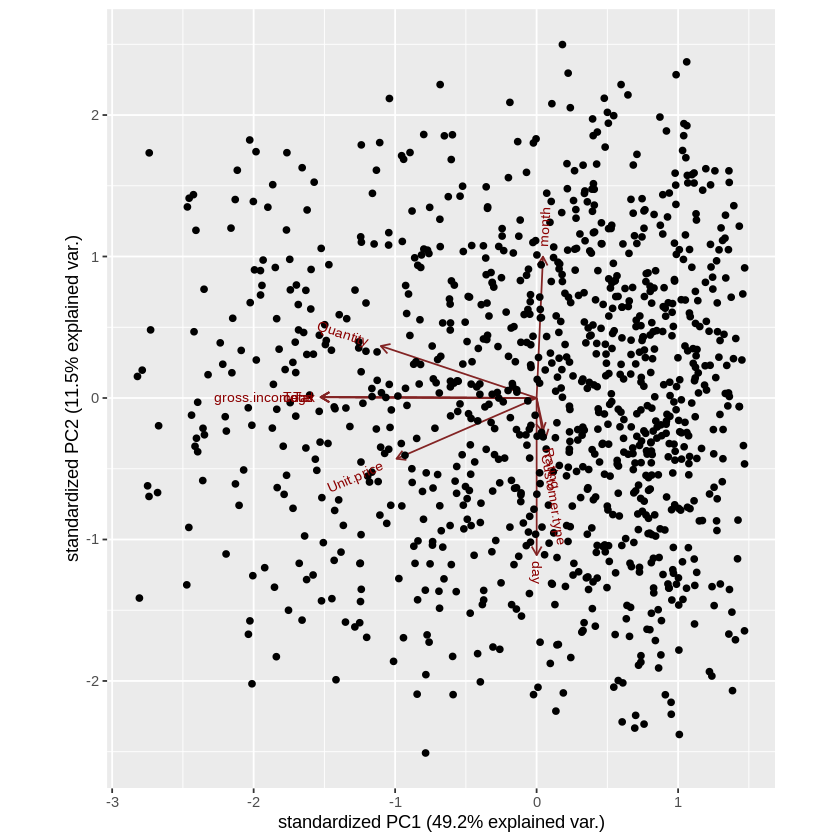

In [152]:
# Then Loading our ggbiplot library
#  
library(ggbiplot)
ggbiplot(df.pca)

# From the graph we will see that the variables hp, cyl and disp contribute to PC1, 
# with higher values in those variables moving the samples to the right on the plot.

##Part 2: Feature Selection

This section requires you to perform feature selection through the use of the unsupervised learning methods and  perform your analysis and provide insights on the features that contribute the most information to the dataset.



##> Filter methods



In [153]:
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)


In [154]:
#finding the correlation matrix
correlationMatrix <- cor(df)
correlationMatrix

,Customer.type,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total,month,day
Customer.type,1.000000000,-0.020237875,-0.01676271,-0.01967028,-0.01967028,-0.01967028,0.018888672,-0.01967028,0.005972443,0.034124208
Unit.price,-0.020237875,1.000000000,0.01077756,0.63396209,0.63396209,0.63396209,-0.008777507,0.63396209,-0.027387186,0.057020896
Quantity,-0.016762706,0.010777564,1.00000000,0.70551019,0.70551019,0.70551019,-0.015814905,0.70551019,-0.014524276,-0.043346859
Tax,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
cogs,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
gross.income,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
Rating,0.018888672,-0.008777507,-0.01581490,-0.03644170,-0.03644170,-0.03644170,1.000000000,-0.03644170,-0.042880374,-0.007075821
Total,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
month,0.005972443,-0.027387186,-0.01452428,-0.02230134,-0.02230134,-0.02230134,-0.042880374,-0.02230134,1.000000000,-0.118996386
day,0.034124208,0.057020896,-0.04334686,-0.00251477,-0.00251477,-0.00251477,-0.007075821,-0.00251477,-0.118996386,1.000000000


In [155]:
# Find attributes that are highly correlated

highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes

highlyCorrelated

names(df[,highlyCorrelated])

[1] 4 5 6

[1] "Tax"          "cogs"         "gross.income"

the above three variables are the highly correlated variables in our dataset

In [156]:
#removing the variables with a higher correlation 
# and comparing the results graphically
# Removing Redundant Features 

df1<- df[-highlyCorrelated]

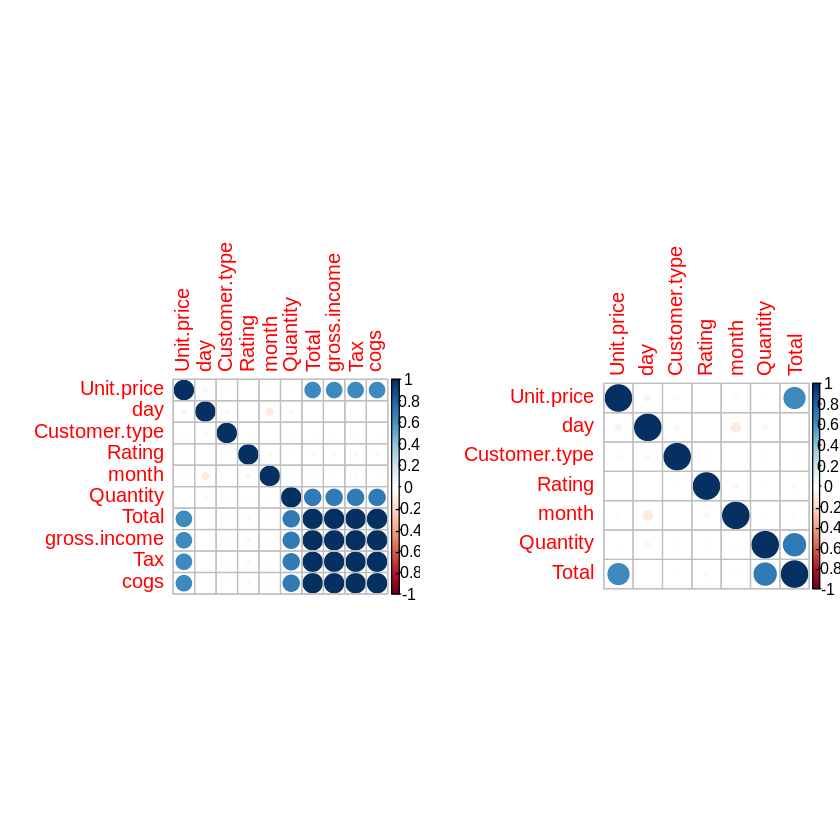

In [157]:
# Performing our graphical comparison

par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(df1), order = "hclust")

#Part 3: Association Rules

This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. provide insights for your analysis.



In [158]:
#installing the required arules library 
#\
suppressWarnings(
        suppressMessages(if
                         (!require(arules, quietly=TRUE))
                install.packages("arules")))
library(arules)
install.packages("arulesViz")
library(arulesViz)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [159]:
df1 <- read.transactions("Supermarket_Sales_Dataset II.csv",sep=",")
df1


Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [160]:
# Verifying the object's class

class(df1)

[1] "transactions"
attr(,"package")
[1] "arules"

In [161]:
# Previewing our first 5 transactions
#
inspect(df1[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [162]:
# Generating a summary of the transaction dataset : information such as the most purchased items, 

summary(df1)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [163]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing some operation in percentage terms of the total transactions 
# 
itemFrequency(df1[, 8:10],type = "absolute")
round(itemFrequency(df1[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
        107          69          86

black tea blueberries  body spray 
       1.43        0.92        1.15

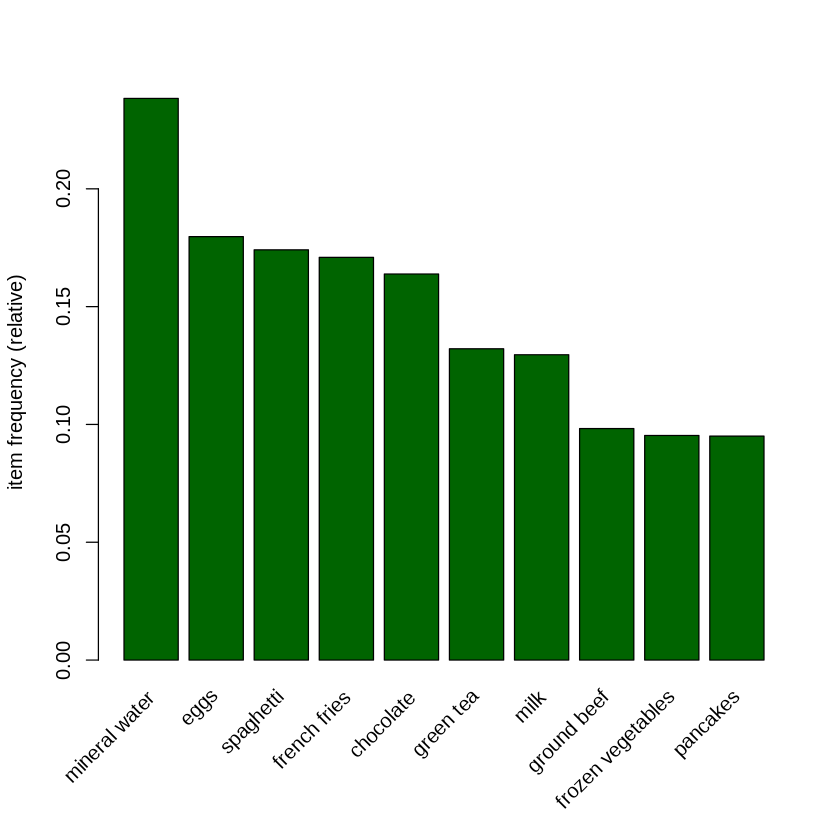

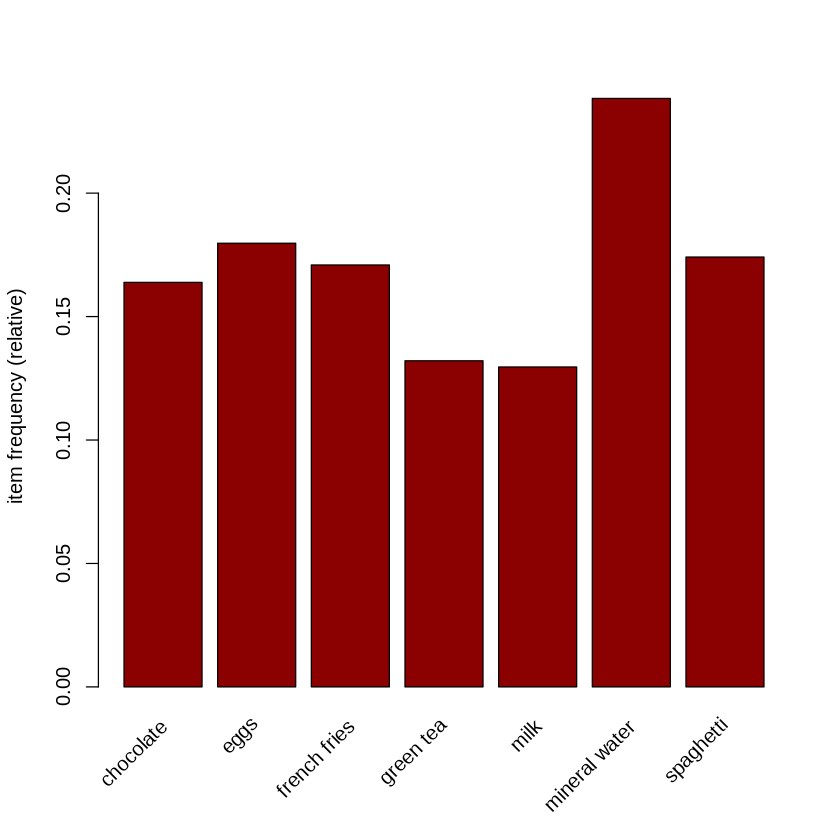

In [164]:
# plot the frequency of items
itemFrequencyPlot(df1, topN = 10,col="darkgreen")
itemFrequencyPlot(df1, support = 0.1,col="darkred")

In [165]:
# Building a model based on association rules 
# using the apriori function using Min Support as 0.001 and confidence as 0.8

rules <- apriori (df1, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [166]:
# Building a apriori model with Min Support as 0.001 and confidence as 0.7.
rules2 <- apriori (df1,parameter = list(supp = 0.001, conf = 0.7))
rules2

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [200 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 200 rules 

In [167]:
#exploring our model through the use of the summary function as shown
summary(rules)

#most rules have 3 and 4 items though some rules do have upto 6.

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
 data ntransactions support confidence
  df1          7501   0.001        0.8

In [168]:
# Observing rules built in our model i.e. first 5 model rules

inspect(rules[1:5])

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


 Interpretation of the 1st 2 rule above:
 
if someone bought frozen smoothie and spinach, the likelyhood that they buy mineral water is 89%.
if one bought bacon, pancakes , they they have an 81% likelyhyood of buying sphagetti and so on.

In [169]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


the above 5 rules have a confidence level of 100 for the 1st 4 and 95% for the last one.

In [170]:
# If we were ti make a promotion relating to the sale of say: cake, 
# we create a subset of rules concerning these products 
# This would tell us the items that the customers bought before purchasing yogurt

mineralwater <- subset(rules, subset = rhs %pin% "mineral water")
 
# Then order by confidence
mineralwater<-sort(mineralwater, by="confidence", decreasing=TRUE)
inspect(mineralwater[1:5])

    lhs                    rhs                 support confidence    coverage     lift count
[1] {ground beef,                                                                           
     light cream,                                                                           
     olive oil}         => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[2] {cake,                                                                                  
     olive oil,                                                                             
     shrimp}            => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[3] {red wine,                                                                              
     soup}              => {mineral water} 0.001866418  0.9333333 0.001999733 3.915511    14
[4] {ground beef,                                                                           
     pancakes,                                                        

In [171]:
#we can also determine items what customers might buy who have previously bought an item , in this case: mineral water?
# Subset the rules
mineralwater <- subset(rules, subset = lhs %pin% "mineral water")

# Order by confidence
mineralwater<-sort(mineralwater, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(mineralwater[1:5])

    lhs                                   rhs           support     confidence
[1] {cake,meatballs,mineral water}     => {milk}        0.001066524 1.0000000 
[2] {eggs,mineral water,pasta}         => {shrimp}      0.001333156 0.9090909 
[3] {herb & pepper,mineral water,rice} => {ground beef} 0.001333156 0.9090909 
[4] {light cream,mineral water,shrimp} => {spaghetti}   0.001066524 0.8888889 
[5] {grated cheese,mineral water,rice} => {ground beef} 0.001066524 0.8888889 
    coverage    lift      count
[1] 0.001066524  7.717078  8   
[2] 0.001466471 12.722185 10   
[3] 0.001466471  9.252498 10   
[4] 0.001199840  5.105326  8   
[5] 0.001199840  9.046887  8   


#Part 4: Anomaly Detection

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

In [172]:
# Installing anomalize package

install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [173]:
library(anomalize)

In [174]:
# Collect our time series data

tidyverse_cran_downloads

date,count,package
<date>,<dbl>,<chr>
2017-01-01,873,tidyr
2017-01-02,1840,tidyr
2017-01-03,2495,tidyr
2017-01-04,2906,tidyr
2017-01-05,2847,tidyr
2017-01-06,2756,tidyr
2017-01-07,1439,tidyr
2017-01-08,1556,tidyr
2017-01-09,3678,tidyr


In [196]:
data2 <- read_csv("Supermarket_Sales_Forecasting.csv")
head(data2)


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_character(),
  Sales = col_double()
)




Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [197]:
# Check the data types of the 2 columns
sapply(data2, class)


Date       Sales 
"character"   "numeric"

In [198]:
# convert Date datatype from character to Date
#
data2$Date <- as.Date(data2$Date )
sapply(data2, class)


Date     Sales 
   "Date" "numeric"

In [199]:
#Convertion to POCIXct type
data2$Date <- as.POSIXct(data2$Date)

In [200]:
#Converting the data frame to tibble
#
df2 <- as_tibble(data2)
head(df2)

Date,Sales
<dttm>,<dbl>
1-05-20,548.9715
3-08-20,80.2200
3-03-20,340.5255
NA,489.0480
2-08-20,634.3785
NA,627.6165


In [201]:
suppressWarnings(
        suppressMessages(if
                         (!require(tibble, quietly=TRUE))
                install.packages("tibble")))
library(tibble)

suppressWarnings(
        suppressMessages(if
                         (!require(tibbletime, quietly=TRUE))
                install.packages("tibbletime")))

library(tibbletime)


In [206]:
install.packages("dplyr")
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [203]:
#setting date as index for ease in anormaly detection and visualiation
df2 <- df2 %>%
                    tibbletime::as_tbl_time(index = Date)

In [ ]:
#Detecting our anomalies
# plot_anomalies() - 
# we now plot using plot_anomaly_decomposition() to visualize out data.
df2 %>%
  time_decompose(Sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>% 
  plot_anomaly_decomposition()